# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train')

# idx = np.random.permutation(len(full_train.x))
# full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]
full_train_x,full_train_y = full_train.x, full_train.y


del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//6,:], full_train_x[full_train_x.shape[0]//6:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//6,:], full_train_y[full_train_y.shape[0]//6:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(15552, 1000, 102) y:(15552, 1)
Validation data: x:(3110, 1000, 102) y:(3110, 1)


## Model

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_name = 'boosting_lstm_new_2'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True),input_shape=(1000,102)),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

    model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4,0.9,0.999),
              metrics=['accuracy',tf.keras.metrics.AUC()])
    
    if show_summary:
        model.summary()
    
    return model
    
num_of_bags = 10
epochs_per_bag = 250
start_from_bag = 0


## Training with Boosting

Training bag 0
[1. 1. 1. ... 1. 1. 1.]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1000, 256)         236544    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normaliza

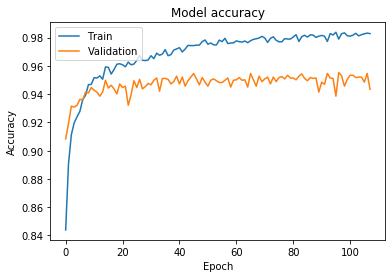

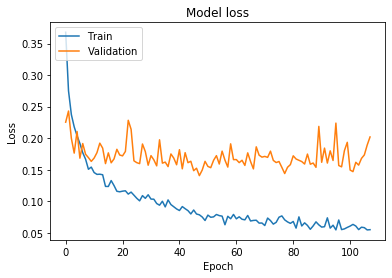

Training bag 1
(15552, 1)
(15552,)
[4.86969948e-03 9.29832458e-06 1.90734863e-06 ... 1.19904608e-01
 0.00000000e+00 6.50311112e-02]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 1)
(6051,)
Saved to result_boosting_lstm_new_2_boost1.csv
[0.86738664 0.52564898 0.90337777 ... 0.14047143 0.29942387 0.99679053]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 84s - loss: 0.7181 - accuracy: 0.6100 - auc_3: 0.6413 - val_loss: 0.8331 - val_accuracy: 0.5347 - val_auc_3: 0.6800
Epoch 2/250
9330/9330 - 80s - loss: 0.6277 - accuracy: 0.6632 - auc_3: 0.7178 - val_loss: 0.8669 - val_accuracy: 0.6035 - val_auc_3: 0.6760
Epoch 3/250
9330/9330 - 80s - loss: 0.5811 - accuracy: 0.6981 - auc_3: 0.7639 - val_loss: 0.8607 - val_accuracy: 0.5916 - val_auc_3: 0.7041
Epoch 4/250
9330/9330 - 80s - loss: 0.5546 - accuracy: 0.7133 - auc_3: 0.7850 - val_loss: 1.0880 - val_accuracy: 0.5810 - val_auc_3: 0.6659
Epoch 5/250
9330/9330 - 80s - loss: 0.5221 - accuracy: 0.7313 - auc_3: 0.8131 - val_loss: 0.5884 - val_accuracy: 0.7312 - val_auc_3: 0.8017
Epoch 6/250
9330/9330 - 80s - loss: 0.4919 - accuracy: 0.7486 - auc_3: 0.8368 - val_loss: 0.8776 - val_accuracy: 0.

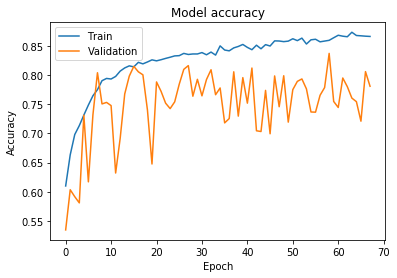

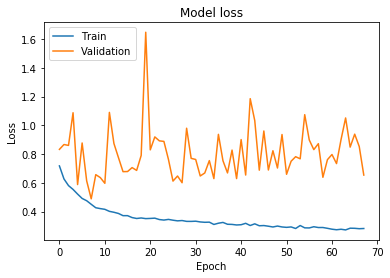

Training bag 2
(15552, 2)
(15552,)
[0.00354177 0.04255319 0.01894861 ... 0.32643449 0.26520479 0.21785975]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 2)
(6051,)
Saved to result_boosting_lstm_new_2_boost2.csv
[0.6405946  0.4944607  0.44278353 ... 0.28473088 0.03480007 0.41307616]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 83s - loss: 0.5155 - accuracy: 0.7623 - auc_5: 0.8282 - val_loss: 0.3249 - val_accuracy: 0.8476 - val_auc_5: 0.9500
Epoch 2/250
9330/9330 - 79s - loss: 0.4214 - accuracy: 0.8167 - auc_5: 0.8813 - val_loss: 0.3238 - val_accuracy: 0.8717 - val_auc_5: 0.9600
Epoch 3/250
9330/9330 - 80s - loss: 0.3965 - accuracy: 0.8317 - auc_5: 0.8963 - val_loss: 0.3027 - val_accuracy: 0.8672 - val_auc_5: 0.9710
Epoch 4/250
9330/9330 - 80s - loss: 0.3569 - accuracy: 0.8539 - auc_5: 0.9142 - val_loss: 0.2072 - val_accuracy: 0.9193 - val_auc_5: 0.9735
Epoch 5/250
9330/9330 - 79s - loss: 0.3347 - accuracy: 0.8614 - auc_5: 0.9238 - val_loss: 0.1970 - val_accuracy: 0.9270 - val_auc_5: 0.9747
Epoch 6/250
9330/9330 - 80s - loss: 0.3227 - accuracy: 0.8681 - auc_5: 0.9294 - val_loss: 0.2592 - val_accuracy: 0.

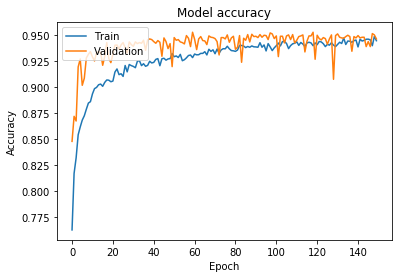

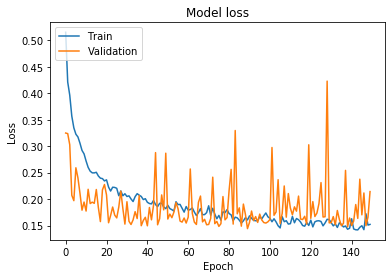

Training bag 3
(15552, 3)
(15552,)
[0.00389069 0.02841282 0.01339173 ... 0.28971469 0.18122053 0.14879107]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 3)
(6051,)
Saved to result_boosting_lstm_new_2_boost3.csv
[0.06823885 0.34755516 0.27208033 ... 0.24466546 0.08716201 0.13611405]
Train on 9330 samples, validate on 3110 samples
Epoch 1/250
9330/9330 - 85s - loss: 0.5907 - accuracy: 0.7148 - auc_7: 0.7770 - val_loss: 0.3952 - val_accuracy: 0.8222 - val_auc_7: 0.9510
Epoch 2/250
9330/9330 - 80s - loss: 0.4990 - accuracy: 0.7761 - auc_7: 0.8351 - val_loss: 0.2431 - val_accuracy: 0.9029 - val_auc_7: 0.9661
Epoch 3/250
9330/9330 - 80s - loss: 0.4537 - accuracy: 0.7972 - auc_7: 0.8615 - val_loss: 0.2211 - val_accuracy: 0.9145 - val_auc_7: 0.9697
Epoch 4/250
9330/9330 - 80s - loss: 0.4216 - accuracy: 0.8188 - auc_7: 0.8803 - val_loss: 0.2233 - val_accuracy: 0.9148 - val_auc_7: 0.9738
Epoch 5/250


KeyboardInterrupt: 

In [3]:
import os
import matplotlib.pyplot as plt
import csv
import math
from data import Data

%matplotlib inline
    
training_loss = np.ones(train_data_x.shape[0])

for bag in range(num_of_bags):
    # Put data into bags
    model = create_model(False)
    train_size = train_data_x.shape[0]//10*6
    if bag != 0 :
        # Check prediction for training data
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(train_data_x)
            else:
                predictions = np.concatenate((predictions,model.predict(train_data_x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        # Select training data poorly predicted 
        training_loss = avg_predictions-np.reshape(train_data_y,(train_data_y.shape[0]))
        training_loss = np.absolute(training_loss)
        print(training_loss)
        
        # Free memory space for test data
        del test_data

    weights = training_loss / np.sum(training_loss, axis=0)
    idx = np.random.choice(np.arange(0, weights.shape[0]),train_size, p=weights)
    print(training_loss[idx])
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]
        
    del model
        
    ## TODO define different models if possible
    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0, 
        patience=60, 
        mode='auto', 
        restore_best_weights=True)
        
        
        
    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=8,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    del model,history,bag_x,bag_y
    

## Restore Weights

In [ ]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np
from data import Data

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))

for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)



## Save Prediction to CSV

In [ ]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')

# Select Model with NN